Attempt to compare C-T transitions in tumor / normal pair

```
cp ~/s3/herv/from_genepi/TCGA_Glioma_HERV52/TCGA-41-5651-* ./

samtools fastq -N -1 TCGA-41-5651-01A.1.fastq.gz -2 TCGA-41-5651-01A.2.fastq.gz TCGA-41-5651-01A.bam 
\rm TCGA-41-5651-01A.bam

bowtie2 --threads 4 -x hg38 --very-sensitive-local -1 TCGA-41-5651-01A.1.fastq.gz -2 TCGA-41-5651-01A.2.fastq.gz -S TCGA-41-5651-01A.sam
samtools sort --threads 3 -o TCGA-41-5651-01A.bam TCGA-41-5651-01A.sam
\rm TCGA-41-5651-01A.sam
chmod -w TCGA-41-5651-01A.bam
samtools index TCGA-41-5651-01A.bam
chmod -w TCGA-41-5651-01A.bam.bai
bcftools mpileup -Ou -f ~/s3/herv/indexes/hg38.fa TCGA-41-5651-01A.bam | bcftools call -mvO z -o TCGA-41-5651-01A.vcf.gz
chmod -w TCGA-41-5651-01A.vcf.gz

zcat TCGA-41-5651-01A.vcf.gz | awk -F"\t" '( !/^#/ && $4 == "C" && $5 == "T"){print $1"\t"$2}' > TCGA-41-5651-01A.CT.txt

zcat TCGA-41-5651-01A.vcf.gz | awk -F"\t" '( !/^#/ && $4 == "C" && $5 == "T"){while("samtools faidx ~/s3/herv/indexes/hg38.fa "$1":"$2-1"-"$2+1" " | getline x ){};print $1"\t"$2"\t"toupper(x)}' > TCGA-41-5651-01A.CT.tri.txt



samtools fastq -N -1 TCGA-41-5651-10A.1.fastq.gz -2 TCGA-41-5651-10A.2.fastq.gz TCGA-41-5651-10A.bam 
\rm TCGA-41-5651-10A.bam
bowtie2 --threads 4 -x hg38 --very-sensitive-local -1 TCGA-41-5651-10A.1.fastq.gz -2 TCGA-41-5651-10A.2.fastq.gz -S TCGA-41-5651-10A.sam
samtools sort --threads 3 -o TCGA-41-5651-10A.bam TCGA-41-5651-10A.sam
\rm TCGA-41-5651-10A.sam
chmod -w TCGA-41-5651-10A.bam
samtools index TCGA-41-5651-10A.bam
chmod -w TCGA-41-5651-10A.bam.bai
bcftools mpileup -Ou -f ~/s3/herv/indexes/hg38.fa TCGA-41-5651-10A.bam | bcftools call -mvO z -o TCGA-41-5651-10A.vcf.gz
chmod -w TCGA-41-5651-10A.vcf.gz


zcat TCGA-41-5651-10A.vcf.gz | awk -F"\t" '( !/^#/ && $4 == "C" && $5 == "T"){print $1"\t"$2}' > TCGA-41-5651-10A.CT.txt

zcat TCGA-41-5651-10A.vcf.gz | awk -F"\t" '( !/^#/ && $4 == "C" && $5 == "T"){while("samtools faidx ~/s3/herv/indexes/hg38.fa "$1":"$2-1"-"$2+1" " | getline x ){};print $1"\t"$2"\t"toupper(x)}' > TCGA-41-5651-10A.CT.tri.txt

```

In [1]:
!head data/TCGA-41-5651-01A.CT.tri.txt

chr1	1277206	CCC
chr1	1277211	TCC
chr1	1277213	CCA
chr1	1277218	TCC
chr1	1277723	TCG
chr1	1277748	CCT
chr1	1277755	CCA
chr1	1277785	TCG
chr1	1277792	ACC
chr1	1277817	GCG


Easier to read in with pandas rather than numpy

The last 2 numbers, followed by a letter designate sample type.

https://wiki.nci.nih.gov/display/TCGA/TCGA+barcode

Tumor types range from 01 - 09, normal types from 10 - 19 and control samples from 20 - 29. See Code Tables Report for a complete list of sample codes

So 01 is tumor and 10 is normal

In [2]:
import pandas
tumor = pandas.read_csv('data/TCGA-41-5651-01A.CT.tri.txt', delimiter="\t", header=None, names=['chr','position','tri'])
normal = pandas.read_csv('data/TCGA-41-5651-10A.CT.tri.txt', delimiter="\t", header=None, names=['chr','position','tri'])

In [3]:
tumor.head()

,chr,position,tri
0,chr1,1277206,CCC
1,chr1,1277211,TCC
2,chr1,1277213,CCA
3,chr1,1277218,TCC
4,chr1,1277723,TCG


In [4]:
len(tumor)

13938

In [5]:
len(normal)

17732

In [6]:
tumor[:10]

,chr,position,tri
0,chr1,1277206,CCC
1,chr1,1277211,TCC
2,chr1,1277213,CCA
3,chr1,1277218,TCC
4,chr1,1277723,TCG
5,chr1,1277748,CCT
6,chr1,1277755,CCA
7,chr1,1277785,TCG
8,chr1,1277792,ACC
9,chr1,1277817,GCG


In [7]:
chromosomes=set(list(tumor.chr) + list(normal.chr))

In [8]:
#for c in chromosomes: print(c)
len(chromosomes)

70

In [9]:
for c in sorted(chromosomes):
    print(c, len(tumor.query( 'chr == @c' )),len(normal.query('chr == @c')))

chr1 1109 1437
chr10 546 878
chr11 621 771
chr11_KI270829v1_alt 1 0
chr12 744 959
chr12_GL383550v2_alt 1 0
chr13 410 494
chr14 444 539
chr14_GL000009v2_random 0 1
chr14_GL000194v1_random 2 1
chr14_GL000225v1_random 2 1
chr14_KI270722v1_random 5 2
chr15 316 525
chr16 430 612
chr16_GL383557v1_alt 4 1
chr16_KI270728v1_random 2 2
chr16_KI270853v1_alt 0 2
chr17 387 590
chr17_GL000205v2_random 4 4
chr17_GL000258v2_alt 0 2
chr17_KI270857v1_alt 1 2
chr17_KI270862v1_alt 0 1
chr17_KI270908v1_alt 0 1
chr17_KI270909v1_alt 1 1
chr18 357 439
chr19 616 834
chr19_GL949746v1_alt 3 1
chr19_GL949747v2_alt 1 0
chr19_GL949748v2_alt 0 1
chr19_GL949749v2_alt 0 2
chr19_GL949753v2_alt 0 1
chr19_KI270866v1_alt 0 4
chr1_GL383518v1_alt 2 0
chr1_KI270707v1_random 1 0
chr1_KI270708v1_random 1 4
chr1_KI270763v1_alt 1 0
chr1_KI270766v1_alt 1 0
chr2 1019 1212
chr20 344 427
chr21 205 245
chr21_GL383581v2_alt 0 1
chr21_KI270873v1_alt 0 1
chr22 174 262
chr22_KI270733v1_random 10 10
chr22_KI270734v1_random 0 1
chr2_KI2708

In [10]:
import numpy as np
import matplotlib.pyplot as plt

Let's try to make all the bins the same width by setting the number of bins equal to the max / some number.

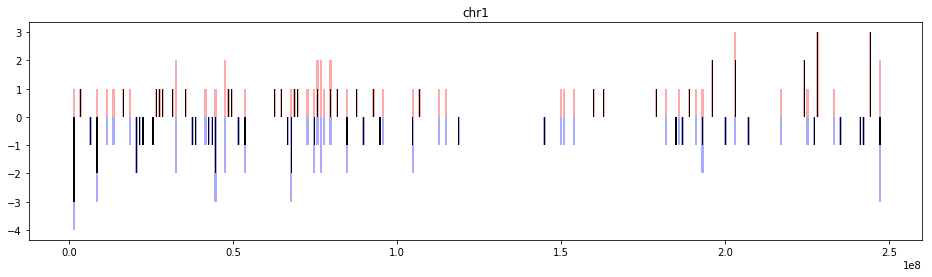

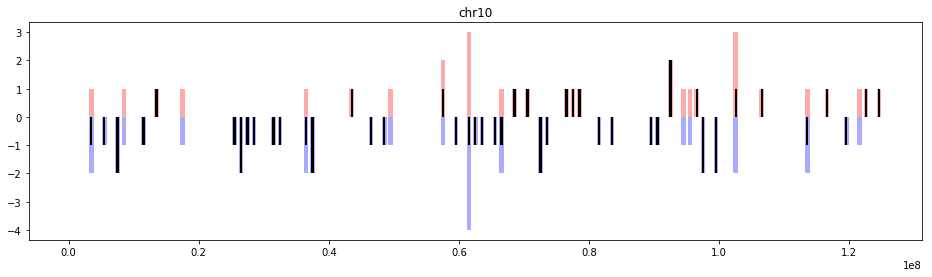

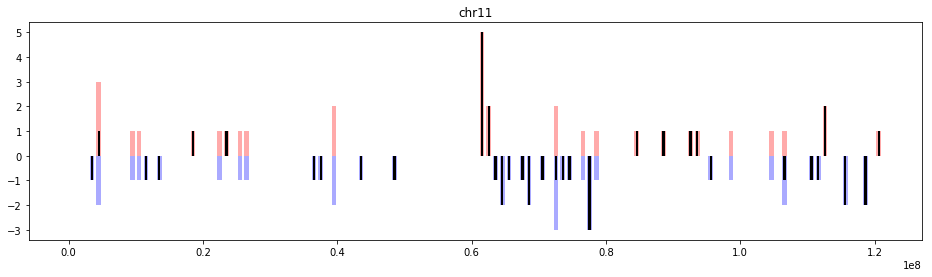

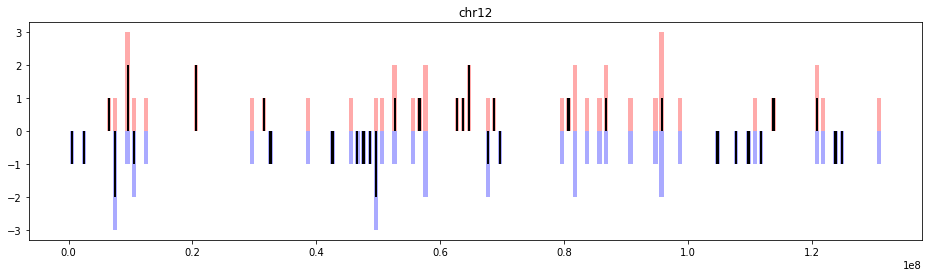

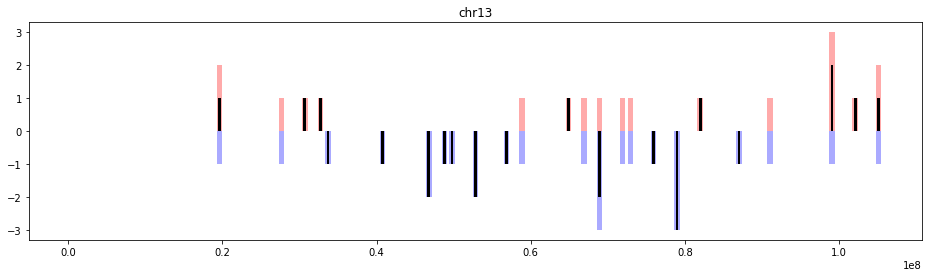

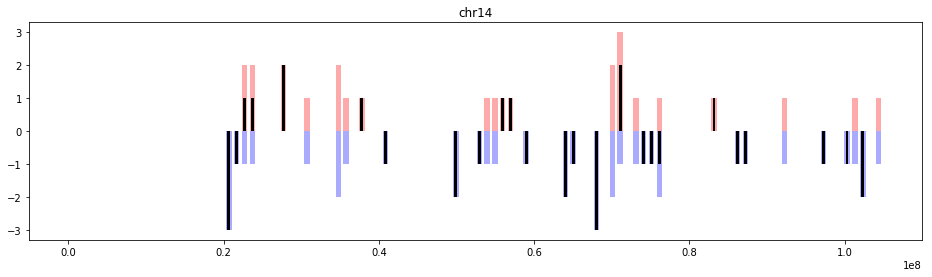

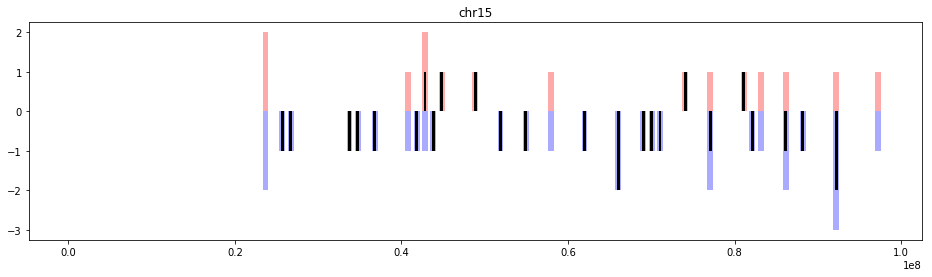

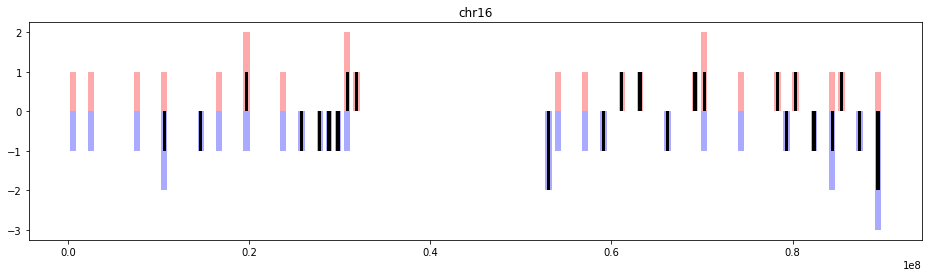

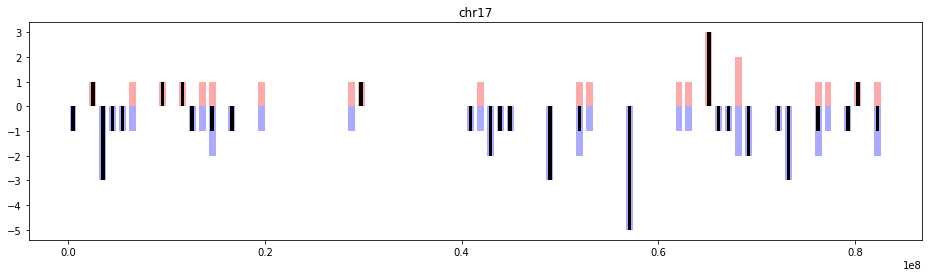

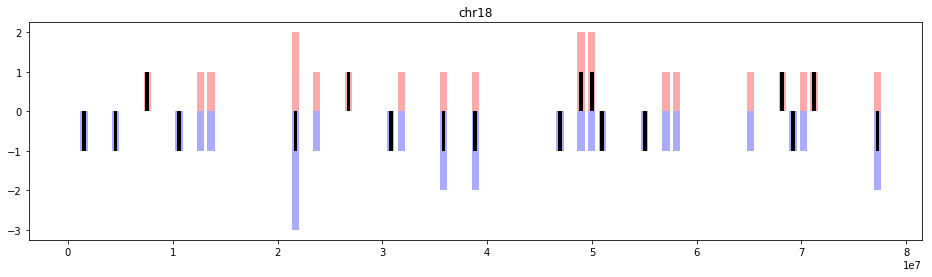

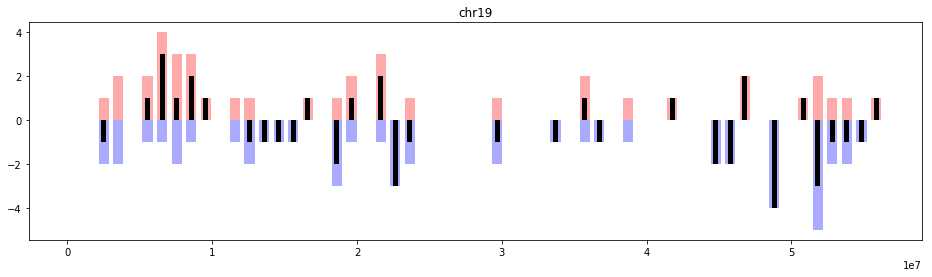

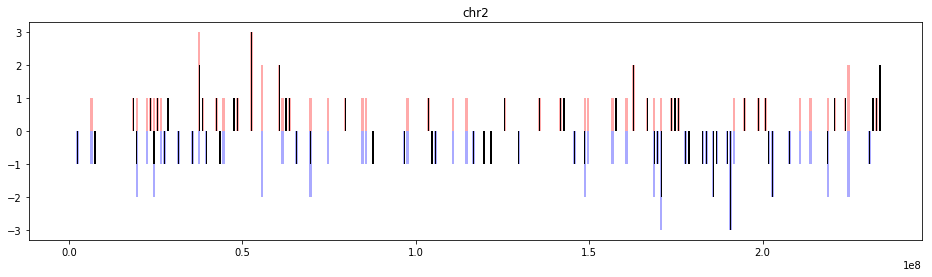

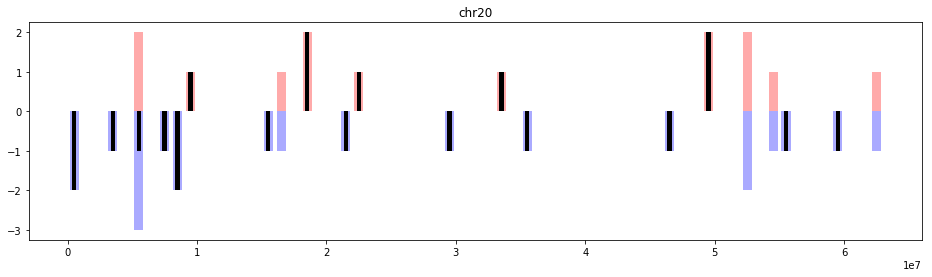

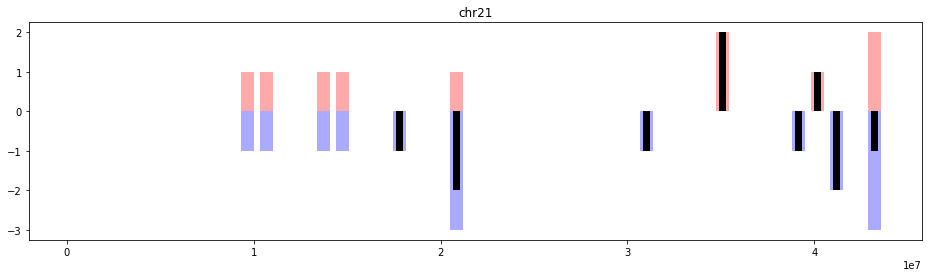

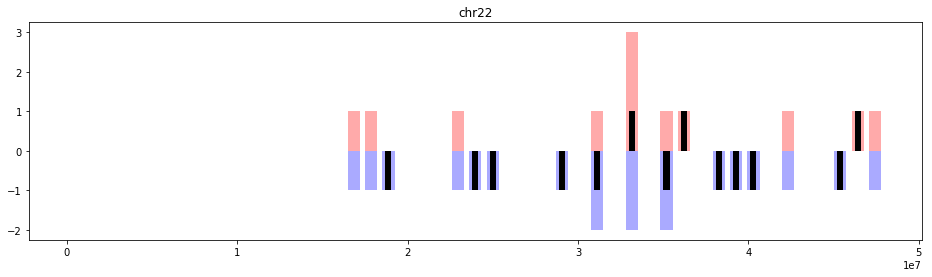

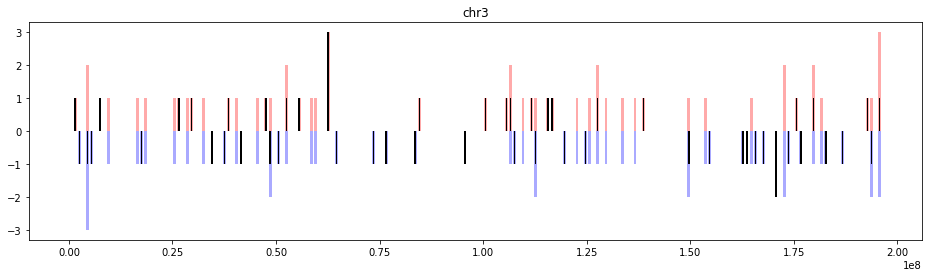

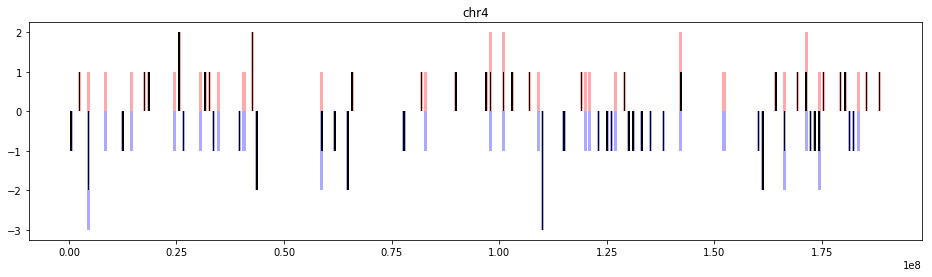

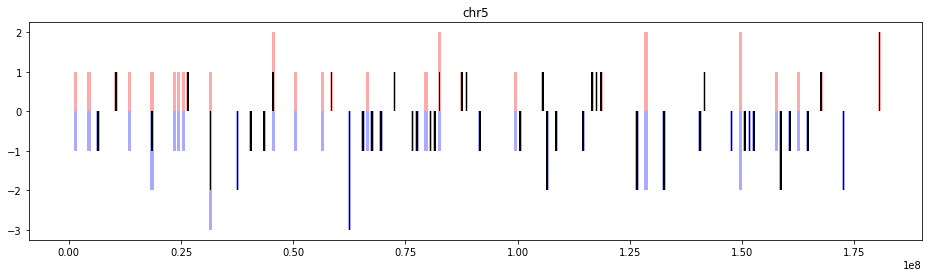

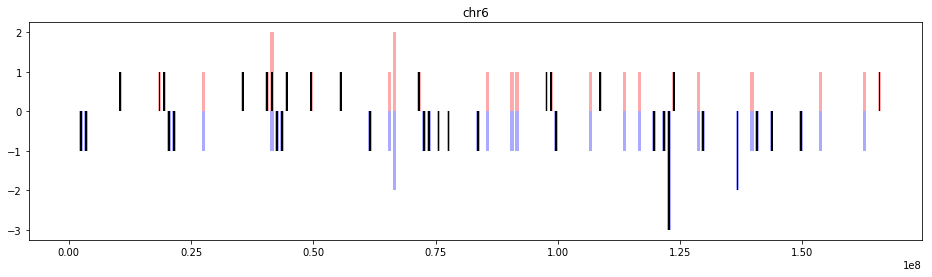

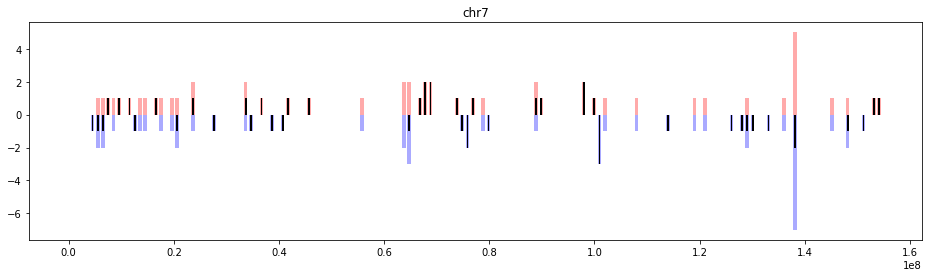

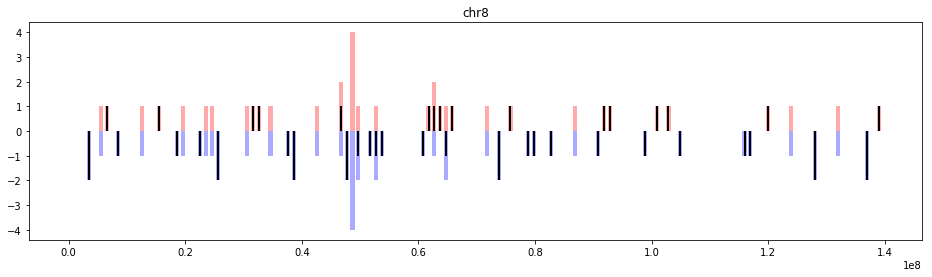

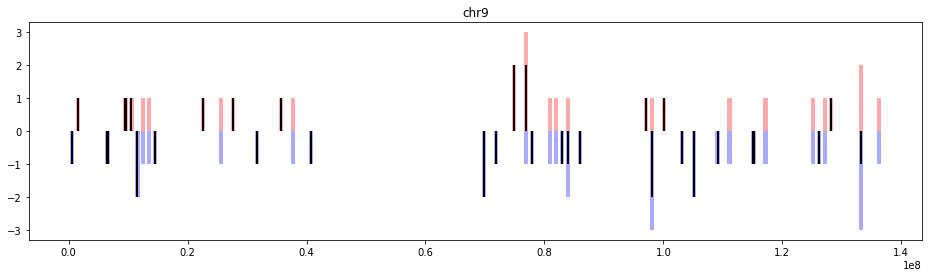

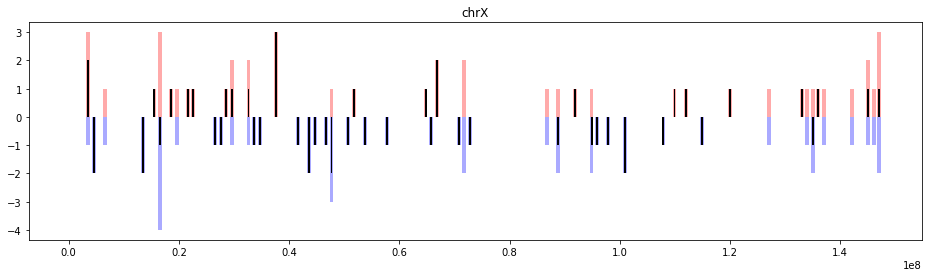

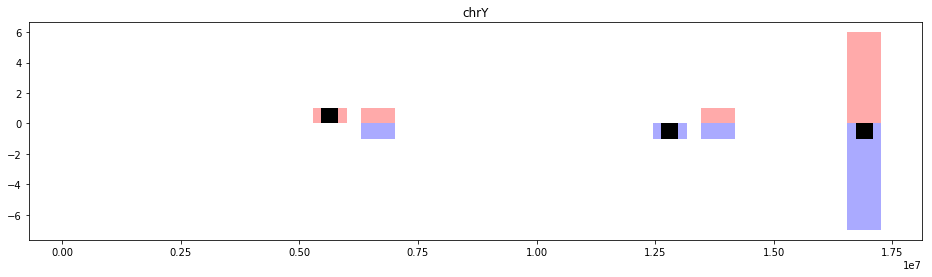

In [11]:
plt.rcParams["figure.figsize"] = [16.0,4.0]
for c in sorted(chromosomes):
    total_length=len(tumor.loc[tumor['chr']==c]['position'])+len(normal.loc[normal['chr']==c]['position'])
    if( total_length > 50 ):
        tumor_array=np.array(tumor[ (tumor['chr']==c) & (tumor['tri']=='TCA')]['position'])
        normal_array=np.array(normal[ (normal['chr']==c) & (normal['tri']=='TCA')]['position'])
        max=np.array(tumor_array.max(), normal_array.max()).max()
        tumor_hist, tumor_bin_edges = np.histogram(tumor_array, bins=int(max/1000000), range=(0,max))
        normal_hist, normal_bin_edges = np.histogram(normal_array, bins=int(max/1000000), range=(0,max))
        hist = tumor_hist - normal_hist
        width = 0.7 * (tumor_bin_edges[1] - tumor_bin_edges[0])
        center = (tumor_bin_edges[:-1] + tumor_bin_edges[1:]) / 2
        plt.title(c)
        plt.bar(center, tumor_hist, align='center', width=width, color='#FFAAAA') # light red
        plt.bar(center, -normal_hist, align='center', width=width, color='#AAAAFF') # light blue
        plt.bar(center, hist, align='center', width=width*0.5, color='black')
        plt.show()

In [12]:
normal.query('chr == "chr1xx"').empty

True

In [13]:
'chr1' not in normal.chr.values

False

In [14]:
tumor.query('((chr in @normal.chr.values) & (position in @normal.position.values))')

,chr,position,tri
0,chr1,1277206,CCC
1,chr1,1277211,TCC
2,chr1,1277213,CCA
3,chr1,1277218,TCC
4,chr1,1277723,TCG
5,chr1,1277748,CCT
6,chr1,1277755,CCA
7,chr1,1277785,TCG
8,chr1,1277792,ACC
9,chr1,1277817,GCG


In [15]:
tumor.query('not ((chr in @normal.chr.values) and (position in @normal.position.values))')

,chr,position,tri
11,chr1,1448965,ACA
17,chr1,1587774,ACC
20,chr1,1790040,CCG
21,chr1,1903901,CCG
22,chr1,2171068,ACG
24,chr1,3000899,TCT
26,chr1,3335443,TCG
28,chr1,3390865,TCA
29,chr1,3659931,TCG
30,chr1,3831032,GCG


Well that can't be right

In [16]:
tumor.query( 'chr == "chrY" and position == 24354280' )

,chr,position,tri
13936,chrY,24354280,GCA


In [17]:
normal.query( 'chr == "chrY" and position == 24354280' )

,chr,position,tri


In [18]:
len(tumor.query('not ((chr in @normal.chr.values) and (position in @normal.position.values))'))

7454

In [19]:
trinucleotides=set(list(tumor.tri) + list(normal.tri))
#trinucleotides

In [20]:
d={}
for c in sorted(chromosomes):
    d[c]={}
    for t in trinucleotides:
        d[c][t]={}
        d[c][t]['normal']=len(normal.query('chr==@c and tri==@t'))
        d[c][t]['tumor']=len(tumor.query('chr==@c and tri==@t'))

In [21]:
df = pandas.DataFrame(data=d)

In [22]:
pandas.set_option("display.max_columns",0) # 0 = all columns (default limit is 20)
df

,chr1,chr10,chr11,chr11_KI270829v1_alt,chr12,chr12_GL383550v2_alt,chr13,chr14,chr14_GL000009v2_random,chr14_GL000194v1_random,chr14_GL000225v1_random,chr14_KI270722v1_random,chr15,chr16,chr16_GL383557v1_alt,chr16_KI270728v1_random,chr16_KI270853v1_alt,chr17,chr17_GL000205v2_random,chr17_GL000258v2_alt,chr17_KI270857v1_alt,chr17_KI270862v1_alt,chr17_KI270908v1_alt,chr17_KI270909v1_alt,chr18,chr19,chr19_GL949746v1_alt,chr19_GL949747v2_alt,chr19_GL949748v2_alt,chr19_GL949749v2_alt,chr19_GL949753v2_alt,chr19_KI270866v1_alt,chr1_GL383518v1_alt,chr1_KI270707v1_random,chr1_KI270708v1_random,chr1_KI270763v1_alt,chr1_KI270766v1_alt,chr2,chr20,chr21,chr21_GL383581v2_alt,chr21_KI270873v1_alt,chr22,chr22_KI270733v1_random,chr22_KI270734v1_random,chr2_KI270894v1_alt,chr3,chr4,chr4_KI270787v1_alt,chr4_KI270925v1_alt,chr5,chr5_GL949742v1_alt,chr6,chr6_GL000250v2_alt,chr6_GL000251v2_alt,chr6_GL000253v2_alt,chr6_GL000254v2_alt,chr6_GL000256v2_alt,chr7,chr8,chr9,chrUn_GL000214v1,chrUn_GL000218v1,chrUn_GL000219v1,chrUn_KI270442v1,chrUn_KI270744v1,chrX,chrX_KI270880v1_alt,chrX_KI270913v1_alt,chrY
ACA,"{'normal': 155, 'tumor': 138}","{'normal': 97, 'tumor': 65}","{'normal': 75, 'tumor': 81}","{'normal': 0, 'tumor': 0}","{'normal': 94, 'tumor': 73}","{'normal': 0, 'tumor': 0}","{'normal': 74, 'tumor': 55}","{'normal': 53, 'tumor': 54}","{'normal': 0, 'tumor': 0}","{'normal': 0, 'tumor': 0}","{'normal': 0, 'tumor': 0}","{'normal': 1, 'tumor': 2}","{'normal': 54, 'tumor': 38}","{'normal': 55, 'tumor': 35}","{'normal': 0, 'tumor': 0}","{'normal': 1, 'tumor': 1}","{'normal': 1, 'tumor': 0}","{'normal': 45, 'tumor': 30}","{'normal': 0, 'tumor': 0}","{'normal': 0, 'tumor': 0}","{'normal': 0, 'tumor': 0}","{'normal': 0, 'tumor': 0}","{'normal': 0, 'tumor': 0}","{'normal': 0, 'tumor': 0}","{'normal': 47, 'tumor': 38}","{'normal': 47, 'tumor': 53}","{'normal': 0, 'tumor': 0}","{'normal': 0, 'tumor': 0}","{'normal': 0, 'tumor': 0}","{'normal': 0, 'tumor': 0}","{'normal': 0, 'tumor': 0}","{'normal': 0, 'tumor': 0}","{'normal': 0, 'tumor': 0}","{'normal': 0, 'tumor': 0}","{'normal': 2, 'tumor': 1}","{'normal': 0, 'tumor': 0}","{'normal': 0, 'tumor': 0}","{'normal': 142, 'tumor': 136}","{'normal': 52, 'tumor': 44}","{'normal': 37, 'tumor': 30}","{'normal': 0, 'tumor': 0}","{'normal': 0, 'tumor': 0}","{'normal': 26, 'tumor': 14}","{'normal': 1, 'tumor': 3}","{'normal': 0, 'tumor': 0}","{'normal': 0, 'tumor': 0}","{'normal': 148, 'tumor': 130}","{'normal': 129, 'tumor': 92}","{'normal': 0, 'tumor': 0}","{'normal': 0, 'tumor': 0}","{'normal': 148, 'tumor': 127}","{'normal': 0, 'tumor': 0}","{'normal': 121, 'tumor': 95}","{'normal': 0, 'tumor': 0}","{'normal': 0, 'tumor': 0}","{'normal': 0, 'tumor': 0}","{'normal': 0, 'tumor': 0}","{'normal': 1, 'tumor': 0}","{'normal': 106, 'tumor': 112}","{'normal': 95, 'tumor': 80}","{'normal': 79, 'tumor': 64}","{'normal': 0, 'tumor': 0}","{'normal': 0, 'tumor': 0}","{'normal': 0, 'tumor': 0}","{'normal': 1, 'tumor': 1}","{'normal': 0, 'tumor': 0}","{'normal': 86, 'tumor': 89}","{'normal': 0, 'tumor': 0}","{'normal': 0, 'tumor': 0}","{'normal': 10, 'tumor': 11}"
ACC,"{'normal': 64, 'tumor': 41}","{'normal': 26, 'tumor': 23}","{'normal': 27, 'tumor': 26}","{'normal': 0, 'tumor': 0}","{'normal': 45, 'tumor': 36}","{'normal': 0, 'tumor': 0}","{'normal': 15, 'tumor': 16}","{'normal': 16, 'tumor': 17}","{'normal': 0, 'tumor': 0}","{'normal': 0, 'tumor': 0}","{'normal': 0, 'tumor': 0}","{'normal': 0, 'tumor': 0}","{'normal': 23, 'tumor': 18}","{'normal': 27, 'tumor': 18}","{'normal': 0, 'tumor': 0}","{'normal': 0, 'tumor': 0}","{'normal': 0, 'tumor': 0}","{'normal': 11, 'tumor': 6}","{'normal': 0, 'tumor': 0}","{'normal': 0, 'tumor': 0}","{'normal': 0, 'tumor': 0}","{'normal': 0, 'tumor': 0}","{'normal': 0, 'tumor': 0}","{'normal': 0, 'tumor': 0}","{'normal': 17, 'tumor': 15}","{'normal': 18, 'tumor': 18}","{'normal': 0, 'tumor': 0}","{'normal': 0, 'tumor': 0}","{'normal': 0, 'tumor': 0}","{'normal': 0, 'tumor': 0}","{'normal': 0, 't